<div style="text-align: right"> CS824 - Lab 3a (2022) </div>

# Practical Introduction to Probability

Before we get into the coding, a quick reminder of some terminology:

**Experiment**: an occurance haivng an uncertain outcome that we can observe.
<br>e.g. *Rolling a 6-sided die*

**Sample space**: the set of all possible outcomes.
<br>e.g. `{1,2,3,4,5,6}`

**Outcome**: the result of an experiment (sometimes called an *atomic event*).
<br>e.g. `{5}`

**Event**: a subset of possible outcomes (one or more atomic events) that together are what we are interested in.
<br>e.g. `{2, 4, 6}`

**Probability value (or distribution)**: a mapping of every possible event to a number (or density function) in the range [0 - 1] that represents how likely this particular event is.
<br>e.g. `E` = {1, 3, 5}
<br>**P**(`E`) = 0.50


<br>
This lab draws heavily on a great tutorial created by **Peter Norvig** from 2016, in it he states that the key motivation was based on the simple statement of Pierre-Simon Laplace made in 1814 (so researchers have been thinking hard about probability for over two centuries!):
> Probability ... is thus simply a fraction whose numerator is the number of favorable cases and whose denominator is the number of all the cases possible ... when nothing leads us to expect that any one of these cases should occur more than any other.

However, any errors that may have been introduced by short-cuts and/or alterations, are entirely my fault...


## Code for `unif_P` 

We normally use `P` to refer to the probability function. We can construct a function (`unif_P`) that is a bit more limited and is based on the *discrete uniform probabilty law* - i.e. using Laplace's idea of two sets of countable elements (what he referred to as "cases").


In [2]:
def unif_P(event, sample_space): 
    """Returns the probability of an event, given a [sample_space] of outcomes that are all equally likely. 
    The function assumes that it is being passed two {set} objects, for which there are a range of Python 
    operators to allow for simple manipulation of the elements in each set."""
    
    prob_real = len(event) / len(sample_space)
    return prob_real


## Let's see how this might work for the case of rolling a die

Let's assume we have a fair six-sided die...  what is the probability of rolling an even number?  

We can define the sample space `six_sided_die` and an event `even`. We can then use our function to compute the probability...

In [3]:
six_sided_die = {1, 2, 3, 4, 5, 6}
even = {2, 4, 6}

unif_P(even, six_sided_die)

0.5

OK - that seemed to work, but we could have done that calculation in our heads! Did we really need Python?!  Well let's be patient as we will soon get to some sets/calculations that are not so trivial. 

Also, will this function always give us the correct answer? It should if our inputs are 'well behaved', but what will happen if we do something like what is shown in the next cell?

In [4]:
even2 = {2, 4, 6, 8, 10, 12}

unif_P(even2, six_sided_die)

1.0

The members of the set `even2` are indeed all even numbers but half of them do not belong in our current sample space, perhaps this variable was intended to be used in a situation where two dice were being thrown...  We can modify our function by applying the `&` operator to elements on the numerator, thus ensuring that **_only_** those members of `event` which actually belong in the `sample_space` are included.

The modified function can be seen below...

In [5]:
def unif_P(event, sample_space): 
    """Returns the probability of an event, given a sample space of outcomes that are all equally likely. Uses set objects
    in Python where it is simple to manipulate the elements in each set."""
    
    prob_real = len(event & sample_space) / len(sample_space)
    return prob_real

In [6]:
even2 = {2, 4, 6, 8, 10, 12}

unif_P(even2, six_sided_die)

0.5

That seemed to work.  It could be seen as a little bit of a 'fudge' as we probably should not allow elements that are not in the sample space to be passed to the function at all, but this works and is a bit simpler than putting in lots of exception clauses and returning error values, etc.

One other thing that may be a problem is that we are returning real values, which can look a bit 'ugly', but more importantly can also introduce rounding errors (as you can see below)...


In [7]:
four_or_five = {4, 5}

unif_P(four_or_five, six_sided_die)

0.3333333333333333

So in the final version (for now) of our `unif_P` function, we will use the `Fraction` function to return exact values...  but we will also provide a five decimal place version of the equivalent real number after this as that can be a useful quick estimate for those of us not so good at doing fractions in our head.


In [8]:
from fractions import Fraction

def unif_P(event, sample_space): 
    """Returns the probability of an event, given a sample space of outcomes that are all equally likely. Uses set objects
    in Python where it is simple to manipulate the elements in each set."""
    
    prob_fraction = Fraction(len(event & sample_space), len(sample_space))
    # I realise that these next 3 lines could be done as a single line, but many are just starting out in Python...
    # Indeed we don't really 'need' any of the variables here and could have directly specified the return
    # line with all of the calculations - but I'm not sure that would be as informative from a 'learning' perspective.
    prob_real = len(event & sample_space) / len(sample_space)
    prob_real_txt1 = str(prob_real)
    prob_real_txt = "=" + '{:.7}'.format(prob_real_txt1)
    return prob_fraction, prob_real_txt

In [9]:
four_or_five = {4, 5}

unif_P(four_or_five, six_sided_die)

(Fraction(1, 3), '=0.33333')



# Now let's look inside an 'urn'

Working a century before Laplace (early 1700s), Jacob Bernoulli was also writing about probability and one of his favourite ways to illustrate things was to discuss the idea of taking coloured balls from an urn. These feature in his famous thesis *[Ars Conjectandi](https://en.wikipedia.org/wiki/Ars_Conjectandi)*, and ever since that time it has been common to find explanations of probability that refer to the **urn problem**. (Those who watched the MrNystrom video will have seen his 'poker chips in bag' variant of this!)


Here is an example of the type of problem that we might typically be asked to explore:

> An urn contains 23 balls: 8 white, 6 blue, and 9 red. We will now select **six** balls at random where each ball is equally likely to be selected. What is the probability of various possible outcomes? e.g.:
> - all balls are white
> - exactly 4 balls are red
> - 3 are blue, 2 are red, and 1 is white
> - etc.

So, each **outcome** involves a set of 6 balls, and the **sample space** is the set of all possible 6 ball combinations. Let's see whether we can solve problems of this type using our `unif_P` function, and some basic arithmetic - using the *counting* ideas we noted in the lecture (permutation, combinations, etc.). However, when thinking about *counting* here we need to remember that:
1. we have multiple balls of the same color. 
2. each outcome is a *set* of balls, but the order in which they were selected doesn't matter. (i.e. This is not the same as a *sequence*, where order matters...  Remember the difference between a combination and a permutation. In actual fact a "combination lock" should be called a "permutation lock" - as order matters!! Similarly, "give me the combination to your safe", might not open it!)

To account for the first issue, we should label each ball uniquely - e.g. the 8 different white balls will be labelled `'W1'` through `'W8'`, in contrast to just having eight balls all labelled `'W'`.

Due to the way in which sets operate in Python (and therefore within our `unif_P` function), the second issue is handled automatically. However, if we were to carry out calculations by hand, we would sometimes have to first count the number of *permutations* of balls, then get the number of *combinations* by dividing the number of permutations by *c*!, where *c* is the number of balls in a combination. 

For example, if we wanted to choose 2 white balls from the 8 available, there are 8 ways to choose a first white ball and 7 ways to choose a second, and therefore 8 * 7 = 56 permutations of two white balls. But there are only 56 / 2 = 28 combinations, because in the case where sequence is not important `(W1, W2)` is the same combination as `(W2, W1)`. However, due to the way that {sets} operate in our function (countability within Python) this issue is already handled.


We can use some of the nice string concatenation and set features of Python to allow us to generate a set made up of elements whose labels come from one of two lists from each of which we will take a single character.


In [10]:
def char_cross(A, B):
    """Generate a set that contains all ways of concatenating a single character from the collection A with one 
    from a second collection B."""
    return {a + b 
        for a in A for b in B}

In [11]:
urn_white = char_cross('W', '12345678')

urn_white

{'W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8'}

So, now we have a set with the white balls but before completing the contents of our urn make sure that you understand the way in which this function works.


## Exerise 1  (SUBMIT)
Use the function we have just created (`char_cross`) to generate a set that describes the cards in a normal deck of [playing cards](https://en.wikipedia.org/wiki/Playing_card_suit). (i.e. 4 four suits with cards running from Ace to King in each suit.)



Assuming that you used a variable named `deck` to capture the output of your function, then entering the Python statements below should result in "52" (for the number of cards in your deck) and then a list of all of these 52 cards...


In [12]:
deck = char_cross([str(a) for a in range(1,14)],'♣♦♥♠')

In [13]:
len(deck)

52

In [14]:
print(deck)

{'2♥', '3♣', '12♦', '13♦', '9♥', '3♥', '2♠', '10♣', '3♦', '9♠', '1♥', '6♣', '11♣', '11♠', '5♦', '8♥', '12♣', '13♥', '9♦', '6♦', '2♦', '3♠', '4♥', '5♣', '8♦', '4♦', '11♦', '10♦', '11♥', '7♦', '5♥', '1♣', '4♠', '10♠', '5♠', '7♥', '7♠', '6♥', '2♣', '8♠', '13♣', '1♠', '7♣', '12♥', '13♠', '9♣', '1♦', '12♠', '6♠', '10♥', '4♣', '8♣'}


You should be aware that {sets} are inherently un-ordered in Python, so the order in which the output appears can sometimes be confusing!

For the case of our urn, we can't quite get away with the same approach because the number of balls of each colour is different, so instead we can do the following... (i.e. Generate three sets and `combine` them to describe our urn that contains 8 white, 6 blue, and 9 red balls). 


In [15]:
urn = char_cross('W', '12345678') | char_cross('B', '654321') | char_cross('R', '123456789') 

len(urn)

23

This appears to have generated the 23 elements of our urn, we can also check the actual contents...

In [16]:
urn

{'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'B6',
 'R1',
 'R2',
 'R3',
 'R4',
 'R5',
 'R6',
 'R7',
 'R8',
 'R9',
 'W1',
 'W2',
 'W3',
 'W4',
 'W5',
 'W6',
 'W7',
 'W8'}

Notice that in this case the set has been re-ordered by Python into alpha-numneric order... I specified the order of the blue balls in 'reverse' order simply to illustrate this. I am not entirely sure when sets are re-ordered for display in this way - the were not for the 52 card deck example above...  but in general you should assume that sets are **unordered** for the purposes of making reference to them.


OK, so now that we have described the contents of our urn, we are in a position to define the sample space of interest in this problem. Note that we were asked to randomly select six balls from the urn, so lets define `U6` to be the set of all possible 6-ball combinations.

As you might imagine there are some handy tools for carrying out 'counting' operations on sets on Python and we are going to use the `itertools` library to help us here. You can read more about the 'combinations' iterator and others at the Python documentation site under [Cominatoric generators](https://docs.python.org/3.7/library/itertools.html). 


In [17]:
import itertools

def combos(items, n):
    "All combinations of n items; with each set member/combination being returned as a concatenated string."
    return {' '.join(combo) 
            for combo in itertools.combinations(items, n)}


We have used `itertools.combinations` to generate all specified combinations and then join each string combination into an output set.

If we call this function with n=6 (i.e. the various 6-ball members from the sample space of our urn), how large is this space?

In [18]:
U6 = combos(urn, 6)

In [19]:
len(U6)

100947

So while 'counting' has always been an option (theoretically) you can see why actually enumerating events was not a very pragmatic approach before the advent of computers!!  Even now (with computers) we can't really 'look' at the output - at least not all 100,947 elements in the set...

We could look at the first dozen...

In [20]:
for value in enumerate(itertools.islice(U6, 12)):
    print(value)

(0, 'B5 R1 R5 R6 R7 W2')
(1, 'B4 B6 R1 R8 W5 W2')
(2, 'W4 R2 R6 W5 W1 R9')
(3, 'B6 R5 R6 R7 W2 R9')
(4, 'B4 R3 R1 R5 W1 W2')
(5, 'W4 R4 B2 W7 W2 R9')
(6, 'B4 B6 R3 B2 R6 W5')
(7, 'B4 W4 R3 R5 R2 R7')
(8, 'W3 R3 B2 R6 R7 W5')
(9, 'W3 B6 B3 R8 W5 W1')
(10, 'W6 B4 R1 R5 R2 W5')
(11, 'W6 B6 R5 B2 B1 R9')


I have to confess that I'm not clear about the ordering rules for this set - but I guess that I shouldn't really care - perhaps a better approach would have been to just select a **random sample** of them to see what they look like...  (**NB** - you will almost certainly get a *different* set to those shown below, hopefully for obvious reasons!)

In [21]:
import random

random.sample(U6, 12)

['B4 B5 R3 R5 R2 W7',
 'W3 B5 B3 R8 R6 R7',
 'W4 B6 R2 W5 W7 R9',
 'R4 B2 B1 R6 R7 W1',
 'W3 B4 R3 R2 W7 R9',
 'B5 W4 R1 R4 W8 R9',
 'W3 R5 R7 W5 W1 R9',
 'W6 R3 R4 W1 W2 R9',
 'W6 R1 R4 B1 R7 W8',
 'W6 R3 B1 R6 W8 R9',
 'W6 B6 B3 R5 B2 W7',
 'B4 B6 R6 R7 W5 R9']

If we wanted to check that our combinations were correct (i.e. that there are in fact 100,947 elements) then we would use the formula that [mathematicians](https://en.wikipedia.org/wiki/Combination) call "23 choose 6". Once we have chosen the first item (from 23), we can then choose any of the 22 remaining items on our second choice, and so on down until we have just 18 options at our sixth choice. As we don't care about the order of the six items, we divide the product of these six choices by 6! (the number of permutations of 6 separate things) giving us:

$$23 ~\text{choose}~ 6 = \frac{23 \cdot 22 \cdot 21 \cdot 20 \cdot 19 \cdot 18}{6!} = 100,947$$

If you can accept (or take a little time to work out) that $23 \cdot 22 \cdot 21 \cdot 20 \cdot 19 \cdot 18 = 23! \;/\; 17!$, then we can generalise the specific formula noted above to take the form:

$$n ~\text{choose}~ c = \frac{n!}{(n - c)! \cdot c!}$$


We could then code up with formula in Python to see whether we did in fact have the correct number of elements in our `U6` sample space (of '23 choose 6')...

In [22]:
from math import factorial

def choose(n, c):
    "Number of ways to choose c items from a list of n items."
    return factorial(n) // (factorial(n - c) * factorial(c))

In [23]:
choose(23, 6)

100947

## Exerise 2  (SUBMIT)
Before moving on to the actual problems that we had set out, have a look at what the sample space would look like if we were only going to select, say, 3 balls.

- Generate the `U3` sample space
- Take a look at some of the members of the resulting set
- Check that the size of this space (len(U3)) agrees with the mathematicians' `choose` definition


In [24]:
U3 = combos(urn, 3)
len(U3)

1771

In [25]:
random.sample(U3, 12)

['R5 R2 W1',
 'B6 R5 B2',
 'R1 W5 W7',
 'B2 B1 W1',
 'R3 B2 R6',
 'B6 R4 R9',
 'W6 B4 W1',
 'W3 R1 W8',
 'R5 B1 W7',
 'R7 W5 W2',
 'R7 W1 R9',
 'B6 R4 R6']

In [26]:
choose(23, 3) == len(U3)

True

OK, so - at last! - we are ready to take a stab at the problems that were outlined as examples of Bernoulli's questions... 

### Urn Problem 1: what is the probability of selecting 6 white balls? 

In [27]:
white6 = {s for s in U6 if s.count('W') == 6}

unif_P(white6, U6)

(Fraction(4, 14421), '=0.00027')

Can we check this 'manually' to see whether it seems right? How many ways of getting 6 white balls are there?

In [28]:
len(white6)

28

Would the mathematician's 'choose' support this 'counting' approach that tells us their are 28 elements?  Well there are 8 white balls in the urn, and we want to know how many ways we can choose 6 of these:

In [29]:
choose(8, 6)

28

As such the probabilty of getting 6 white balls is just '8 choose 6' divided by the total size of the sample space.

In [30]:
alt_white6 = Fraction(choose(8, 6), len(U6))
alt_white6

Fraction(4, 14421)

This is indeed the same probabilty as we got above. If we had not chosen to include the extra 'decimal' output in our function then we could have used an equality comparison directly to check that these values were the same.

## Exercise 3  (SUBMIT)
Make some minor changes to `unif_P` so that you can cary out a direct logical comparison - such as that shown below.

### Those less familiar with Python may find this a bit confusing, and also you will use the new `unif2_P` quite a bit below, so don't want to get stuck on what is a fairly 'trivial' Python function modification. 


In [31]:

def unif2_P(event, sample_space): 
    """Returns the probability of an event, given a sample space of outcomes that are all equally likely. Uses set objects
    in Python where it is simple to manipulate the elements in each set."""
    
    prob_fraction = Fraction(len(event & sample_space), len(sample_space))
    return prob_fraction

In [32]:
unif2_P(white6, U6) == Fraction(choose(8, 6), len(U6))

True

### Urn Problem 2: What is the probability of exactly 4 red balls?

This is equivalent to choosing 4 out of the 9 red balls, and then any 2 out of the remaing 14 non-red balls. We can solve this using our 'counting' approach or using the maths - two `choose` events, which are independent and so their probabilities can be multiplied...

In [33]:
r4 = {s for s in U6 if
      s.count('R') == 4}

unif2_P(r4, U6)

Fraction(546, 4807)

In [34]:
546/4807

0.11358435614728521

In [35]:
240/4807

0.0499271895152902

In [36]:
unif2_P(r4, U6) == Fraction(choose(9, 4) * choose(14, 2), len(U6))

True

## Exercise 4  (SUBMIT)
Try a third urn problem (below) yourself. You can use **either** the 'counting' or the 'maths' approach... (or both!)


### Urn Problem 3: What is the probability of 3 blue, 2 white, and 1 red?
You should get the result shown below:


In [37]:
Fraction(choose(8,2) * choose(6,3) * choose(9,1), len(U6))

Fraction(240, 4807)

In [38]:
b3w2r1 = {s for s in U6 if
      s.count('B') == 3 and s.count('W') == 2 and s.count('R') == 1}

In [39]:
unif2_P(b3w2r1, U6)

Fraction(240, 4807)

Output should be
`Fraction(240, 4807)`, 
which is almost exactly 5%

# A 'sophisticated' version of `unif_P`, for more general events

As noted above, much of the inspiration for these lab exercises cames from an excellect tutorial created by Peter Norwig.  (I will make a link to his web site after the lab - but didn't want you to 'cheat' and go find all of the answers in his examples!) 

However, I am going to more or less copy/paste this next section from his material as it is quite 'technical', in terms of the Python used - as opposed to any of the probability work. As such it doesn't really matter that you 'get' all the details of the implementation on first reading... just try to appreciate the approach, and realise that introducing this level of increased generality brings a LOT more power to the approach than our initial simple functions - particularly in the card-playing examples, etc.


To quote Norwig...

When calculating the probability of an even die roll, we originally said

    even = {2, 4, 6}
    
But this is rather inelegant...  we had to explicitly enumerate all the even numbers from one to six. What if we wanted to work with a twelve or twenty-sided die, we would have to go back and change the event `even` for each scenario.  It would be much better to define what `even` means once and then use that 'predicate'...

In [40]:
def even(n): return n % 2 == 0

We can also create a function `such_that` that takes a defined predicate and a collection of items, and returns those members of the collection that are covered by the terms of the predicate:

In [41]:
def such_that(predicate, collection): 
    "The subset of elements in the collection for which the predicate is true."
    return {e for e in collection if predicate(e)}

In [42]:
such_that(even, six_sided_die)

{2, 4, 6}

This allows us to deal with our 12-sided die (without explicit enumeration):

In [43]:
twelve_sided_die = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

such_that(even, twelve_sided_die)

{2, 4, 6, 8, 10, 12}

Norwig called his new function for probability simply `P` so we will go with that and now need to edit that function so that we can, for example, make sure that `P(even, D)` will work. That is, we need to modify `P` to accept an event as either as a a *set* of outcomes (as we had before), or as a *predicate* over outcomes:

In [44]:
#is_predicate = callable

def P(event, sample_space): 
    """The probability of an event, given a sample space of equiprobable outcomes.
    The event can be either a set of outcomes, or a predicate (true for outcomes in the event)."""
    if callable(event):
        event = such_that(event, sample_space)
    return Fraction(len(event & sample_space), len(sample_space))


Now lets see how we can use `such_that` and the `even` predicate in this new version of `P`:

In [45]:
P(even, six_sided_die)

Fraction(1, 2)

In [46]:
P(even, twelve_sided_die)

Fraction(1, 2)

This feels like a **lot** of work to have gone to just to save us enumerating the 6 even possibilities on a 12-sided die, or even the 10 possibilities on a 20-sided die, but hopefully you will begin to see the power/rationale in a few eamples below.

*Note*: `such_that` is operating in a very similar manner to Python's built-in function `filter` which you may well have come across elsewhere, except that `such_that` is returning a set.


Below is an example of how we could expand on this approach by defining a new predicate for a more 'interesting' event. This event will be that the outcome of throwing 3 six-sided die will result in a total number that is prime.

(This includes a simple definition of `is_prime` that is efficient enough when we are only working with small numbers, it is NOT generally the way that we would test whether some number was a prime.)

In [47]:
roll_3_dice = {(d1, d2, d3) for d1 in six_sided_die for d2 in six_sided_die for d3 in six_sided_die}

def prime_sum(outcome): return is_prime(sum(outcome))

def is_prime(n): return n > 1 and not any(n % i == 0 for i in range(2, n))

P(prime_sum, roll_3_dice)

Fraction(73, 216)

In [48]:
'{0:.2}'.format(73/216)

'0.34'

## Exerise 5 (SUBMIT)
 
OK, so we got a number - how might we get at least a general sense as to whether this was right?

Well rolling 3 dice will indeed lead to 216 different possible outcomes (6 X 6 X 6) so the demoninator seems correct. 

But what about the numerator (the number on top) - does this seem correct?

There are different ways you could attack this - from a 'back of the envelope' to a more formal maths solution. Try whatever works for you to get a sense as to whether 73/216 (**~0.34**) seems *about right*?


### Solution

We plotted the number of appearances of each possible sum. We will now count how many times each prime number appears in this reduced range, because it is feasible.

3: 1

5: 6

7: 15

11: 27

13: 21

17: 3

Then the answer is $(1+6+15+26+21+3) / 216 = 73 / 216$.

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0., 21.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 25.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 27.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 27.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 25.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., 21.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0., 15.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0., 10.,  0.,  0.,  0.,  0.,  0.

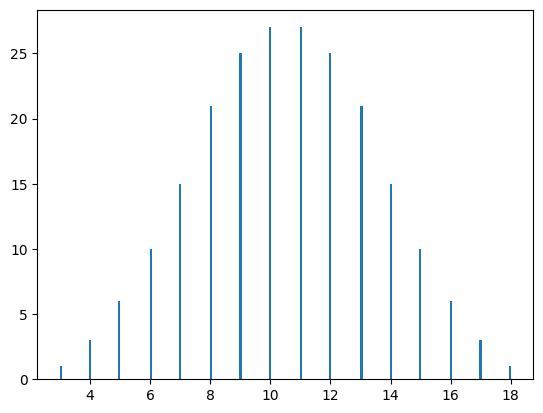

In [49]:
import matplotlib.pyplot as plt

plt.hist([sum(a) for a in roll_3_dice], bins=216)

In [50]:
[ [sum(a) for a in roll_3_dice].count(p) for p in [3,5,7,11,13,17]]

[1, 6, 15, 27, 21, 3]

We also checked every tuple in the `such_that(prime_sum, roll_3_dice)` set to have its sum a prime number:

In [73]:
def verify_num(my_set):
    count = 0
    for my_tuple in list(my_set):
        total = sum(my_tuple)
        print(total)
        if is_prime(total):
            count += 1
    return 'The tuple sums return prime numbers, hence {} is the correct value at numerator'.format(count)
verify_num(such_that(prime_sum, roll_3_dice))

11
7
11
11
13
13
11
7
13
11
13
11
5
7
13
11
13
7
11
11
7
13
11
11
13
11
11
5
13
13
11
5
5
13
13
11
13
5
13
11
7
11
13
7
13
7
7
11
13
7
7
11
11
7
7
17
13
11
13
17
7
13
5
17
7
11
11
11
11
11
13
11
3


'The tuple sums return prime numbers, hence 73 is the correct value at numerator'

You could of course also use the `such_that` function to check which of the 216 outcomes satisfy the `prime_sum` predicate - and if you were really keen you could check that all 73 of these events summed to a prime!!


In [52]:
such_that(prime_sum, roll_3_dice)

{(1, 1, 1),
 (1, 1, 3),
 (1, 1, 5),
 (1, 2, 2),
 (1, 2, 4),
 (1, 3, 1),
 (1, 3, 3),
 (1, 4, 2),
 (1, 4, 6),
 (1, 5, 1),
 (1, 5, 5),
 (1, 6, 4),
 (1, 6, 6),
 (2, 1, 2),
 (2, 1, 4),
 (2, 2, 1),
 (2, 2, 3),
 (2, 3, 2),
 (2, 3, 6),
 (2, 4, 1),
 (2, 4, 5),
 (2, 5, 4),
 (2, 5, 6),
 (2, 6, 3),
 (2, 6, 5),
 (3, 1, 1),
 (3, 1, 3),
 (3, 2, 2),
 (3, 2, 6),
 (3, 3, 1),
 (3, 3, 5),
 (3, 4, 4),
 (3, 4, 6),
 (3, 5, 3),
 (3, 5, 5),
 (3, 6, 2),
 (3, 6, 4),
 (4, 1, 2),
 (4, 1, 6),
 (4, 2, 1),
 (4, 2, 5),
 (4, 3, 4),
 (4, 3, 6),
 (4, 4, 3),
 (4, 4, 5),
 (4, 5, 2),
 (4, 5, 4),
 (4, 6, 1),
 (4, 6, 3),
 (5, 1, 1),
 (5, 1, 5),
 (5, 2, 4),
 (5, 2, 6),
 (5, 3, 3),
 (5, 3, 5),
 (5, 4, 2),
 (5, 4, 4),
 (5, 5, 1),
 (5, 5, 3),
 (5, 6, 2),
 (5, 6, 6),
 (6, 1, 4),
 (6, 1, 6),
 (6, 2, 3),
 (6, 2, 5),
 (6, 3, 2),
 (6, 3, 4),
 (6, 4, 1),
 (6, 4, 3),
 (6, 5, 2),
 (6, 5, 6),
 (6, 6, 1),
 (6, 6, 5)}

# Card Problems

Here is just a couple of examples of how we can use the 'countability' approach and the nice general `P` function that Norwig has suggested above to explore various probabilities associated with card games.

Just in case you are not familar - this link in [Wikipedia](https://en.wikipedia.org/wiki/Playing_card#Modern_deck_formats) gives some background - and also points out that the 4 suits have had many other names/symbols over the years and across different cultures (so apologies for the very 'UK/N America' styling of the examples here). 

We have 4 `suits` {Diamond, Hearts, Spades, Clubs} and 13 `ranks` within each suit from {2} up to {Ace}...  as shown above we can therefore generate a `deck` as a set of 52 cards using our `char_cross` function.

In [53]:
suits = 'SHDC'
ranks = 'A23456789TJQK'
deck  = char_cross(ranks, suits)
len(deck)

52

In [54]:
deck

{'2C',
 '2D',
 '2H',
 '2S',
 '3C',
 '3D',
 '3H',
 '3S',
 '4C',
 '4D',
 '4H',
 '4S',
 '5C',
 '5D',
 '5H',
 '5S',
 '6C',
 '6D',
 '6H',
 '6S',
 '7C',
 '7D',
 '7H',
 '7S',
 '8C',
 '8D',
 '8H',
 '8S',
 '9C',
 '9D',
 '9H',
 '9S',
 'AC',
 'AD',
 'AH',
 'AS',
 'JC',
 'JD',
 'JH',
 'JS',
 'KC',
 'KD',
 'KH',
 'KS',
 'QC',
 'QD',
 'QH',
 'QS',
 'TC',
 'TD',
 'TH',
 'TS'}

## 5-card hands

A hand in a game such as *poker* will (at the end of each round) consist of 5 cards. A question of interest might be, how many possible `hands` exist when you are just starting a game?

Well, using the 'maths' way of specifying this the number would be "52 choose 5" which indicated just under 2.6M possible hands...  so you really have to admire those *card counters*!!

We could also use our 'countability' approach and see what combination of (5 card) `hands` might be randomly sampled from our (52 card) `deck`.


In [55]:
hands = combos(deck, 5)
# assert len(Hands) == choose(52, 5)

In [56]:
len(hands)

2598960

In [57]:
choose(52, 5)

2598960

## Poker hands

We can't meaningfully take a look at all 2.6M possible hands!!!  But we could make a random selection of, say, 6 hands to see whether the contents of each hand makes sense... 

The cards that you see will be different every time (hopefully obvious), and the same card may appear more than once (though NOT in the same hand) - i.e. the scenario we are simulating is just all possible hands, **not** the set of hands that you might get in a game with 6 people playing...

In fact, given that you are looking at 30 of the 52 cards available, it is more likely than not that at least one of the cards will appear more than once.


In [58]:
random.sample(hands, 6)

['3H KS 8H 5S AS',
 '5C JS QD AD QC',
 '2D JH 7C 4C 2S',
 '3C AH 3S 6D 2S',
 '6S 5D 8H AS JC',
 '5D 5S KD 9D QD']

We can now use the idea of *predicates* to answer questions such as the probability of being dealt a flush (5 cards of the same suit).  If you are interested see [hand-ranking categories](https://en.wikipedia.org/wiki/List_of_poker_hands) for a full list of types of hands... though the variations in rules thru time and across countries can make this quite confusing!


In [59]:
def flush(hand):
    return any(hand.count(suit) == 5 for suit in suits)

P(flush, hands)

Fraction(33, 16660)

In [61]:
'{0:.3}'.format(33/16660)

'0.00198'

## Exerise 6 (SUBMIT)
 
Calculate the probability of getting four of a kind:
(Remember that the computer has to check 2.6M hands, so this may take some time!!) My function was called `four_of_a_kind`


In [62]:
def four_of_a_kind(hand):
    return any(hand.count(rank) == 4 for rank in ranks)

In [63]:
P(four_of_a_kind, hands)

Fraction(1, 4165)

Output should be `Fraction(1, 4165)`

So you have almost 10 times as much chance of being dealt a `flush` as you do being dealt `four of a kind`.  You can use the results obtained above, or if you want to do it 'from scratch' then feel free to run the full calcuation - but it may take 20-30 seconds to run...

In [64]:
# Short/quick version
'{0:.3}'.format((33/16660) / (1/4165))

'8.25'

In [65]:
# Re-run the underlying funtions to get proportions
P(flush, hands) / P(four_of_a_kind, hands)

Fraction(33, 4)

In [66]:
'{0:.3}'.format(33/4)

'8.25'

### Exerise  (SUBMIT for 2 bonus marks - but don't attempt until after you have looked at Lab3b)
 
Why not challenge yourself to find the probabilities of some other important [poker hand](https://en.wikipedia.org/wiki/List_of_poker_hands)...

What about:
- three of a kind
- straight
- a full house
- straight flush
- two pairs

The probabilities you discover for each of these should be in the order in which their 'rank' counts in the game of poker - e.g. the lower rank of the 5 hands listed is `two pairs` so this should have the lowest probability. This might help you in terms of being a quick way of checking that you are in the right track.

Many sites on the Web give the probabilities for each outcome based on the 'maths' approach - but you might enjoy the challenge of trying to do this using our 'countability' approach...

In [67]:
def get_ranks(hand):
    """gets the list of ranks as integers in a hand"""
    def to_int(l):
        """gets the assigned number to each rank"""
        if l == 'A': return 1
        if l == 'T': return 10
        if l == 'J': return 11
        if l == 'Q': return 12
        if l == 'K': return 13
        return int(l)
    return [to_int(hand[i]) for i in [0,3,6,9,12]]

In [68]:
def straight_flush(hand):
    rks = get_ranks(hand)
    different_ranks = len(rks) == len(set(rks))
    spanning_five = (max(rks) - min(rks) == 4)
    return any(hand.count(suit) == 5 for suit in suits) and \
        different_ranks and spanning_five

P(straight_flush, hands)

Fraction(3, 216580)

In [69]:
def full_house(hand):
    return any(hand.count(rank) == 3 for rank in ranks) and \
        any(hand.count(rank) == 2 for rank in ranks)

P(full_house, hands)

Fraction(6, 4165)

In [70]:
def straight(hand):
    rks = get_ranks(hand)
    different_ranks = len(rks) == len(set(rks))
    spanning_five = (max(rks) - min(rks) == 4)
    return (not any(hand.count(suit) == 5 for suit in suits)) and \
        different_ranks and spanning_five

P(straight, hands)

Fraction(9, 2548)

In [71]:
def three_of_a_kind(hand):
    return any(hand.count(rank) == 3 for rank in ranks) and \
        (not any(hand.count(rank) == 2 for rank in ranks))
P(three_of_a_kind, hands)

Fraction(88, 4165)

In [72]:
def two_pairs(hand):
    return sum([hand.count(rank) == 2 for rank in ranks]) == 2

P(two_pairs, hands)

Fraction(198, 4165)

## On to Lab3b
 
If you have reached this far then I feel that you should have gained a sense of some of the issues around probability that we are introducing this week, and hopefully learned a few more Python skills/tricks along the way.  If you have questions please note them down and send them along before Wednesday Noon so that we can cover them on Thursday...

If you have reached here with lots of time to spare then you may find it interesting to take a look at **Lab3b** where we take a look at some additional interesting ideas from Peter Norwig's tutorial.
